# 1. 데이터 프레임 만들기

In [1]:
import json
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./meta_data_final.csv")

In [86]:
#[path] 에 데이터가 있는 디렉터리
path = './META_DATA' 

# 경로 내에 파일을 모두 불러옴
file_list = os.listdir(path)

#json 확장자를 가진 파일로 새로운 리스트 생성
json_file_list = [file for file in file_list if file.endswith('.json')]

In [ ]:
json_file_list

In [88]:
DataFrame = []

for j in json_file_list:
    f = open(f"./META_DATA/{j}",'r')
    js = json.loads(f.read())
    DataFrame.append(js)

In [89]:
df = pd.DataFrame(DataFrame)

In [90]:
df.columns = ["성별", "연령대", "사진 위치", "질문1", "샴푸 사용 빈도", "질문2", "펌 주기", "질문3", "염색 주기", "질문4",
             "현재 모발 상태", "질문5", "사용 중인 두피모발 제품", "질문6", "두피케어제품 사용 희망", "질문7", "샴푸 구매시 중요 고려 사항"]

In [91]:
df = df.drop(["질문1", "질문2", "질문3", "질문4", "질문5", "질문6", "질문7"], axis = 1)

# 2. EDA

## 모발 상태 라벨 인코딩

In [147]:
tmp = df["현재 모발 상태"].to_list()

categories = {
    '기타': '기타',
    '염색 모발': '염색 모발',
    '가발 사용(붙임머리 포함)': '가발 사용',
    '모발이식/시술': '모발 이식/시술'
}

In [148]:
tmp_df = pd.DataFrame(tmp, columns=['모발 상태'])

In [150]:
for key, label in categories.items():
    tmp_df[label] = tmp_df['모발 상태'].apply(lambda x: 1 if key in x else 0)

In [152]:
tmp_df.drop("모발 상태", axis = 1)

,기타,염색 모발,가발 사용,모발 이식/시술
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
101022,1,0,0,0
101023,0,1,0,0
101024,1,0,0,0
101025,1,0,0,0


In [174]:
df.to_csv("./meta_data_final.csv", index = False)

## 연령대별 모발 상태

In [11]:
df

,성별,연령대,사진 위치,샴푸 사용 빈도,펌 주기,염색 주기,현재 모발 상태,사용 중인 두피모발 제품,두피케어제품 사용 희망,샴푸 구매시 중요 고려 사항,...,염색 모발,가발 사용,모발 이식/시술,샴푸,린스,트리트먼트,헤어 에센스,두피 세럼,헤어 스타일링제,두피 스케일링제
0,남,20대,TH,1일 2회,4~6회/연,하지않음,기타,"샴푸,헤어에센스",예,세정력,...,0,0,0,1,0,0,1,0,0,0
1,남,60대,RH,1일 1회,하지않음,1~3회/연,기타,샴푸,예,세정력,...,0,0,0,1,0,0,0,0,0,0
2,남,30대,RH,1일 2회,4~6회/연,하지않음,기타,샴푸,예,향,...,0,0,0,1,0,0,0,0,0,0
3,여,60대,TH,1일 1회,1~3회/연,7회 이상/연,염색 모발,"샴푸,린스,헤어에센스,헤어 스타일링제",예,두피자극,...,1,0,0,1,1,0,1,0,1,0
4,여,40대,TH,1일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,린스",예,두피자극,...,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101022,여,40대,TH,1일 1회,하지않음,하지않음,기타,샴푸,예,두피자극,...,0,0,0,1,0,0,0,0,0,0
101023,남,20대,TH,1일 1회,1~3회/연,4~6회/연,염색 모발,"샴푸,헤어에센스,린스",예,머리결,...,1,0,0,1,1,0,1,0,0,0
101024,남,30대,RH,1일 2회,4~6회/연,하지않음,기타,"샴푸,린스,헤어에센스",예,향,...,0,0,0,1,1,0,1,0,0,0
101025,남,20대,RH,1일 2회,하지않음,하지않음,기타,샴푸,예,세정력,...,0,0,0,1,0,0,0,0,0,0


In [13]:
sex_count = df["성별"].value_counts()

In [14]:
sex_count

성별
여    58393
남    42634
Name: count, dtype: int64

In [10]:
len(df[df["성별"] == "남"]),len(df[df["성별"] == "여"])

(42634, 58393)

Text(0.5, 1.0, '< 남녀 성비 >')

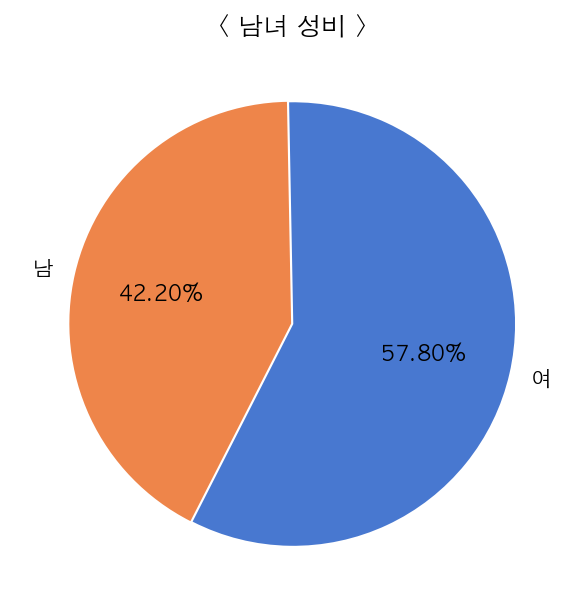

In [29]:
plt.pie(sex_count, labels = sex_count.index, autopct='%1.2f%%',
        colors=sns.color_palette("muted"), explode = [0.005] * len(sex_count), startangle= 243)
plt.title("< 남녀 성비 >")

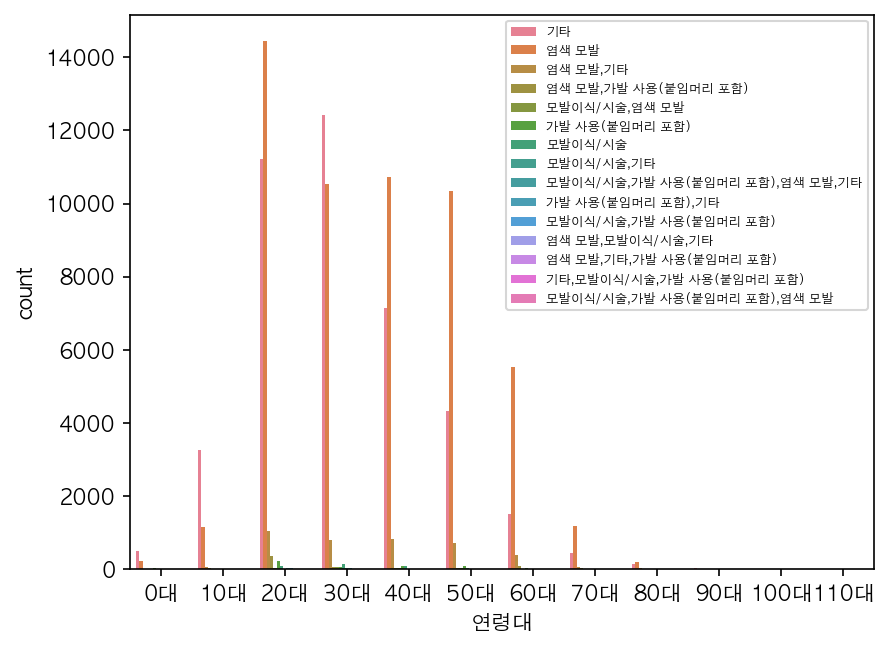

In [11]:
age_order = sorted(df['연령대'], key=lambda x: int(x.replace('대', '')))
sns.countplot(data = df, x = "연령대", hue = "현재 모발 상태", order=age_order)
plt.legend(fontsize = 6)

In [224]:
color_df = df[df["염색 모발"] == 1]
fake_df = df[df["가발 사용"] == 1]
surgery_df = df[df["모발 이식/시술"] == 1]
etc_df = df[df["기타"] == 1]

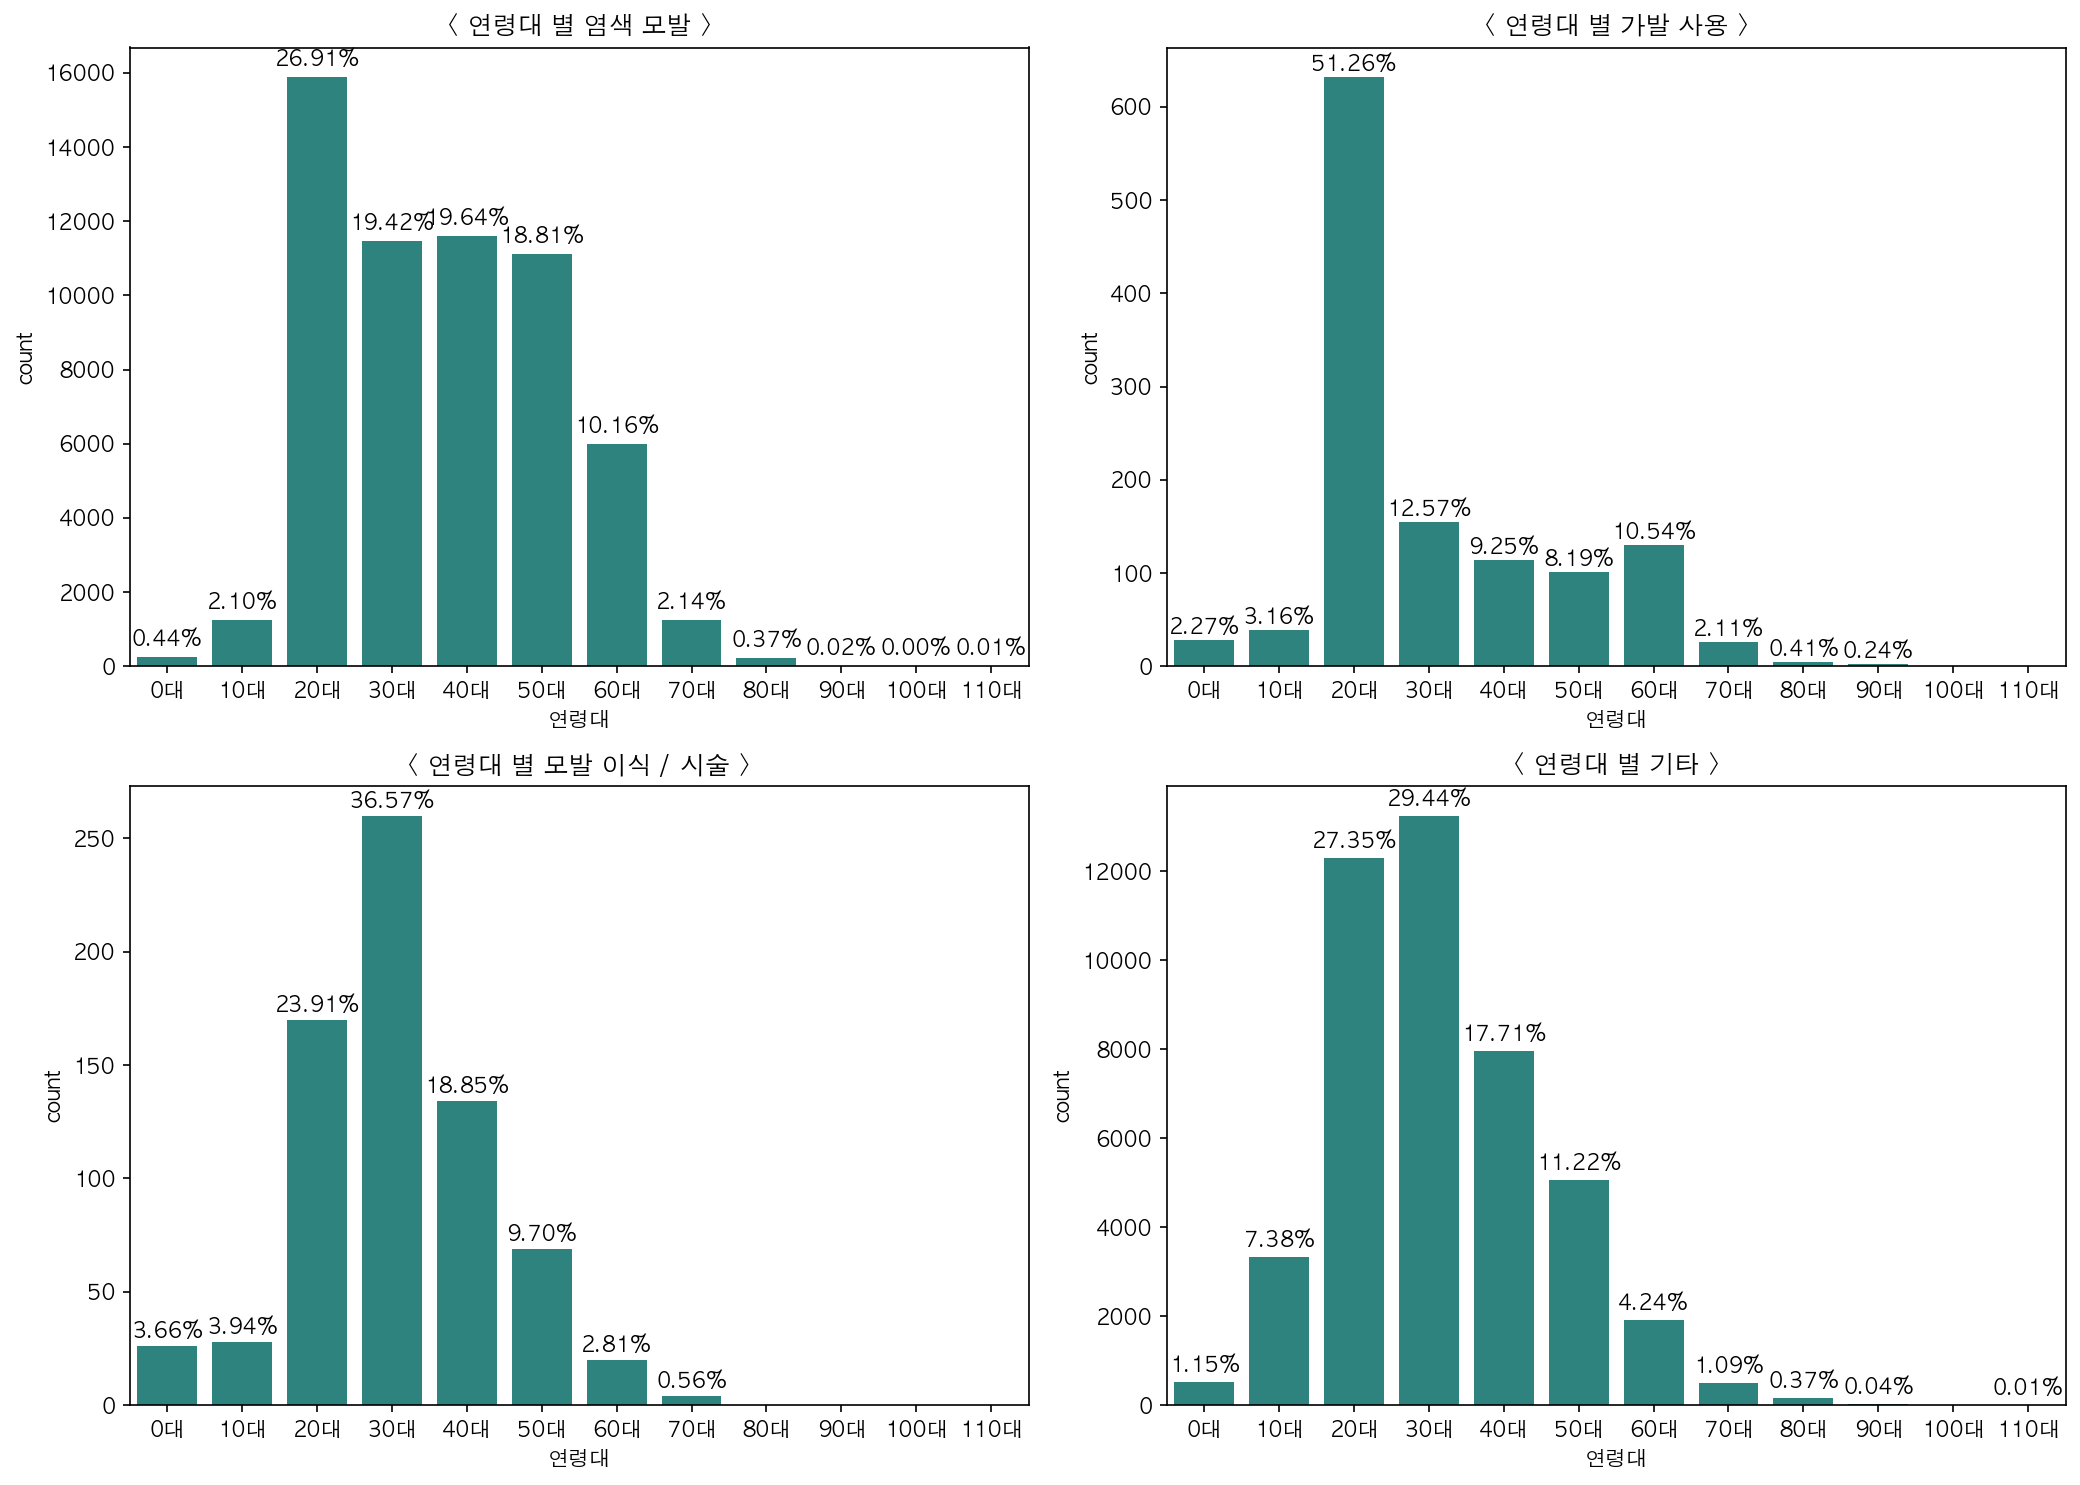

In [242]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=color_df, x="연령대", hue="염색 모발", order=age_order, ax=axes[0, 0], palette="viridis").get_legend().remove()
axes[0, 0].set_title("< 연령대 별 염색 모발 >")
total_count = len(color_df)  # 총 개수 계산
for p in axes[0, 0].patches:
    count = p.get_height()  # 각 바의 높이
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'  # 비율 계산
        offset = 0.005 * total_count  # 텍스트의 높이를 낮추는 값
        axes[0, 0].text(p.get_x() + p.get_width() / 2,  # x 좌표: 바의 중앙
                        p.get_height() + offset,  # y 좌표: 바의 높이보다 약간 낮춤
                        percentage, ha='center')  # 텍스트 중앙 정렬

# 두 번째 서브플롯 - 가발 사용
sns.countplot(data=fake_df, x="연령대", hue="가발 사용", order=age_order, ax=axes[0, 1], palette="viridis").get_legend().remove()
axes[0, 1].set_title("< 연령대 별 가발 사용 >")
total_count = len(fake_df)
for p in axes[0, 1].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.005 * total_count
        axes[0, 1].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

# 세 번째 서브플롯 - 모발 이식 / 시술
sns.countplot(data=surgery_df, x="연령대", hue="모발 이식/시술", order=age_order, ax=axes[1, 0], palette="viridis").get_legend().remove()
axes[1, 0].set_title("< 연령대 별 모발 이식 / 시술 >")
total_count = len(surgery_df)
for p in axes[1, 0].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.005 * total_count
        axes[1, 0].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

# 네 번째 서브플롯 - 기타
sns.countplot(data=etc_df, x="연령대", hue="기타", order=age_order, ax=axes[1, 1], palette="viridis").get_legend().remove()
axes[1, 1].set_title("< 연령대 별 기타 >")
total_count = len(etc_df)
for p in axes[1, 1].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.005 * total_count
        axes[1, 1].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

plt.tight_layout()

## 성별 모발 상태

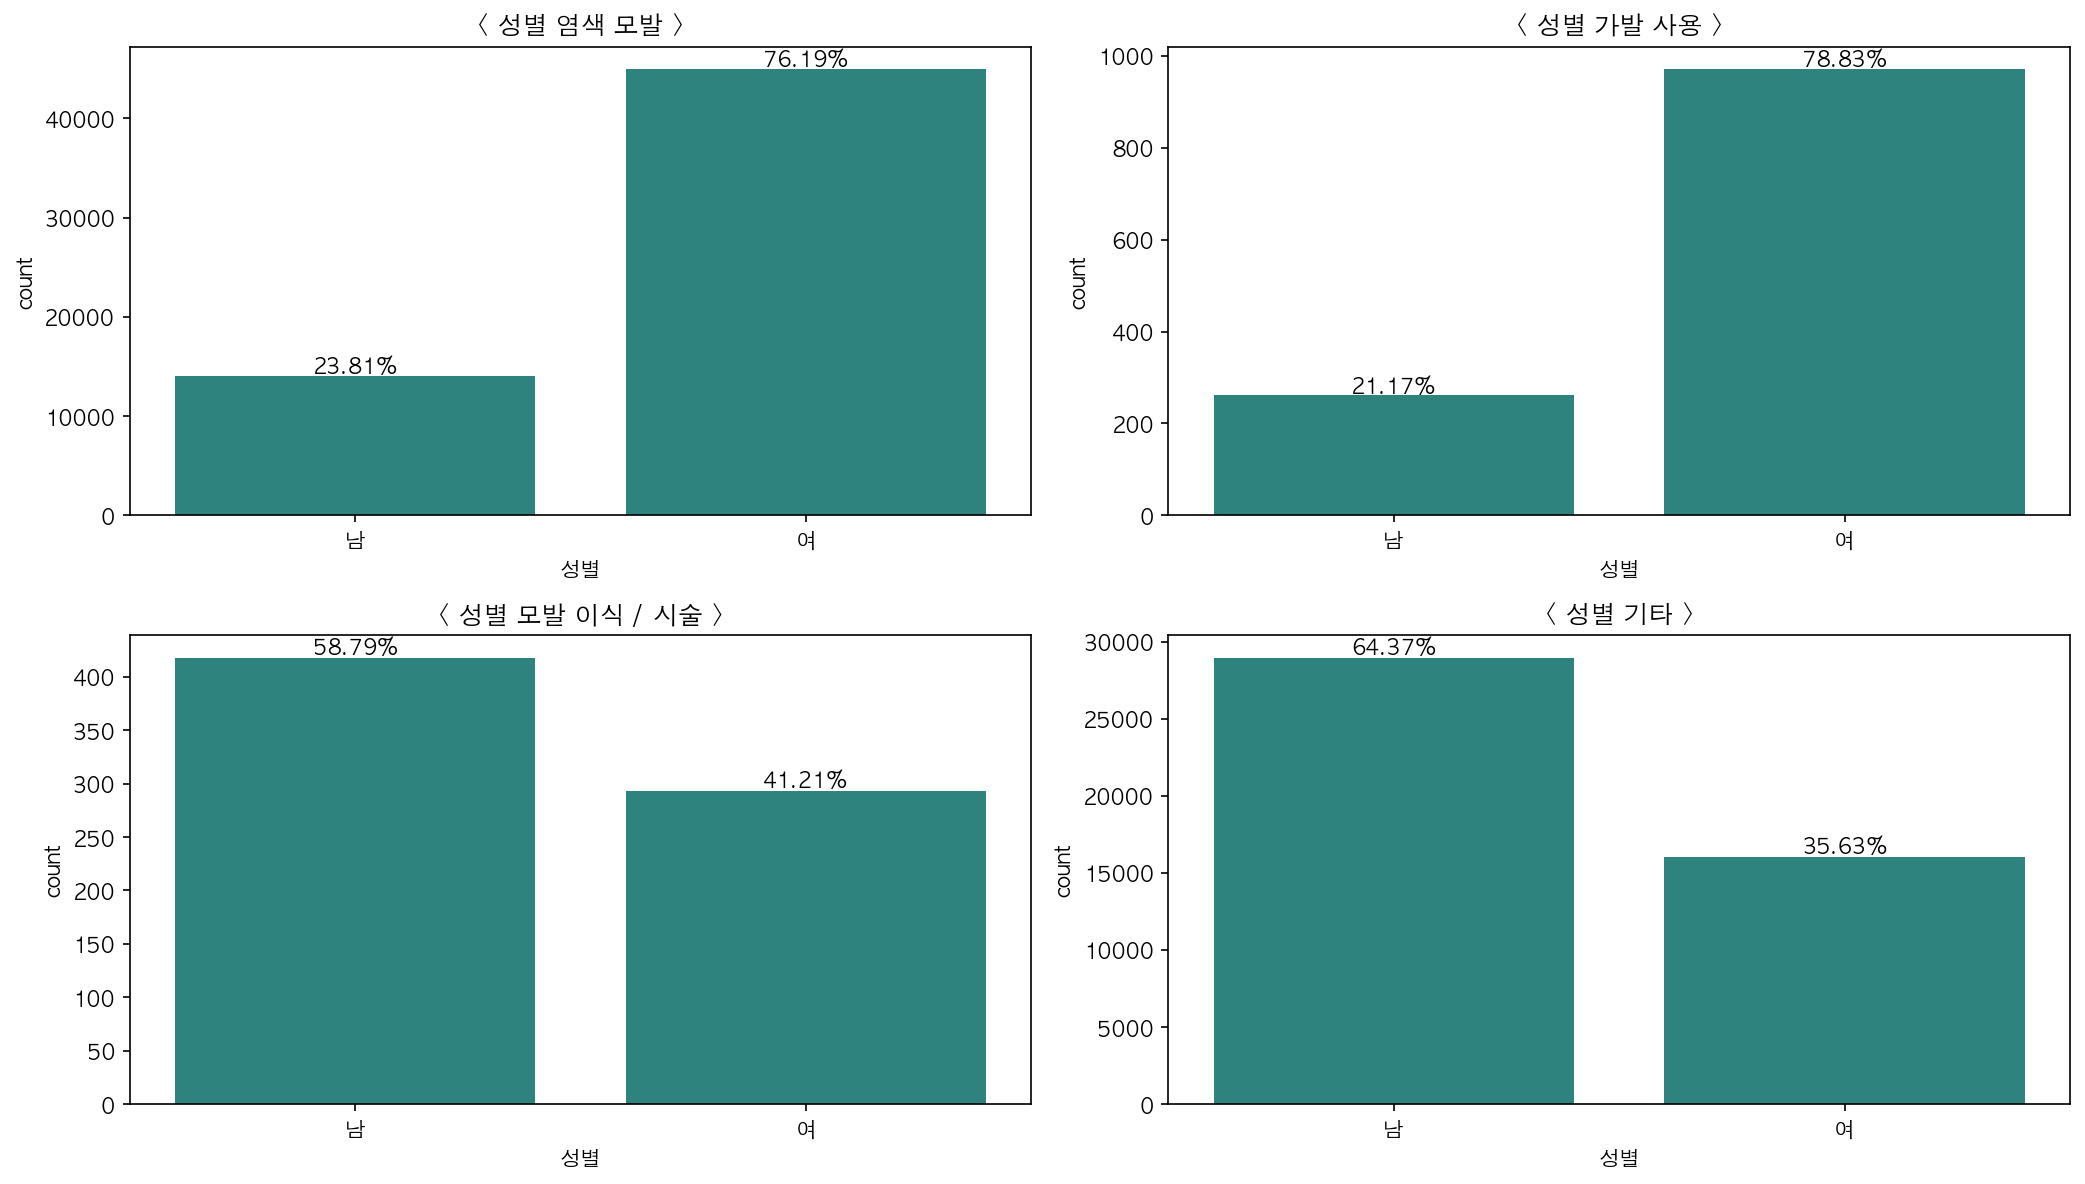

In [7]:
fig, axes = plt.subplots(2, 2, figsize = (14, 8))

sns.countplot(data = color_df, x = "성별", hue = "염색 모발", ax = axes[0, 0], palette="viridis", order = ["남", "여"]).get_legend().remove()
axes[0, 0].set_title("< 성별 염색 모발 >")
total_count = len(color_df)
for p in axes[0, 0].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.005 * total_count
        axes[0, 0].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

sns.countplot(data = fake_df, x = "성별", hue = "가발 사용", ax = axes[0, 1], palette="viridis", order = ["남", "여"]).get_legend().remove()
axes[0, 1].set_title("< 성별 가발 사용 >")
total_count = len(fake_df)
for p in axes[0, 1].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.005 * total_count
        axes[0, 1].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

sns.countplot(data = surgery_df, x = "성별", hue = "모발 이식/시술", ax = axes[1, 0], palette="viridis", order = ["남", "여"]).get_legend().remove()
axes[1, 0].set_title("< 성별 모발 이식 / 시술 >")
total_count = len(surgery_df)
for p in axes[1, 0].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.005 * total_count
        axes[1, 0].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

sns.countplot(data = etc_df, x = "성별", hue = "기타", ax = axes[1, 1], palette="viridis", order = ["남", "여"]).get_legend().remove()
axes[1, 1].set_title("< 성별 기타 >")
total_count = len(etc_df)
for p in axes[1, 1].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.005 * total_count
        axes[1, 1].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

plt.tight_layout()

## 성별 제품 선택시 중요시하는 요인

In [185]:
df

,성별,연령대,사진 위치,샴푸 사용 빈도,펌 주기,염색 주기,현재 모발 상태,사용 중인 두피모발 제품,두피케어제품 사용 희망,샴푸 구매시 중요 고려 사항,기타,염색 모발,가발 사용,모발 이식/시술
0,남,20대,TH,1일 2회,4~6회/연,하지않음,기타,"샴푸,헤어에센스",예,세정력,1,0,0,0
1,남,60대,RH,1일 1회,하지않음,1~3회/연,기타,샴푸,예,세정력,1,0,0,0
2,남,30대,RH,1일 2회,4~6회/연,하지않음,기타,샴푸,예,향,1,0,0,0
3,여,60대,TH,1일 1회,1~3회/연,7회 이상/연,염색 모발,"샴푸,린스,헤어에센스,헤어 스타일링제",예,두피자극,0,1,0,0
4,여,40대,TH,1일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,린스",예,두피자극,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101022,여,40대,TH,1일 1회,하지않음,하지않음,기타,샴푸,예,두피자극,1,0,0,0
101023,남,20대,TH,1일 1회,1~3회/연,4~6회/연,염색 모발,"샴푸,헤어에센스,린스",예,머리결,0,1,0,0
101024,남,30대,RH,1일 2회,4~6회/연,하지않음,기타,"샴푸,린스,헤어에센스",예,향,1,0,0,0
101025,남,20대,RH,1일 2회,하지않음,하지않음,기타,샴푸,예,세정력,1,0,0,0


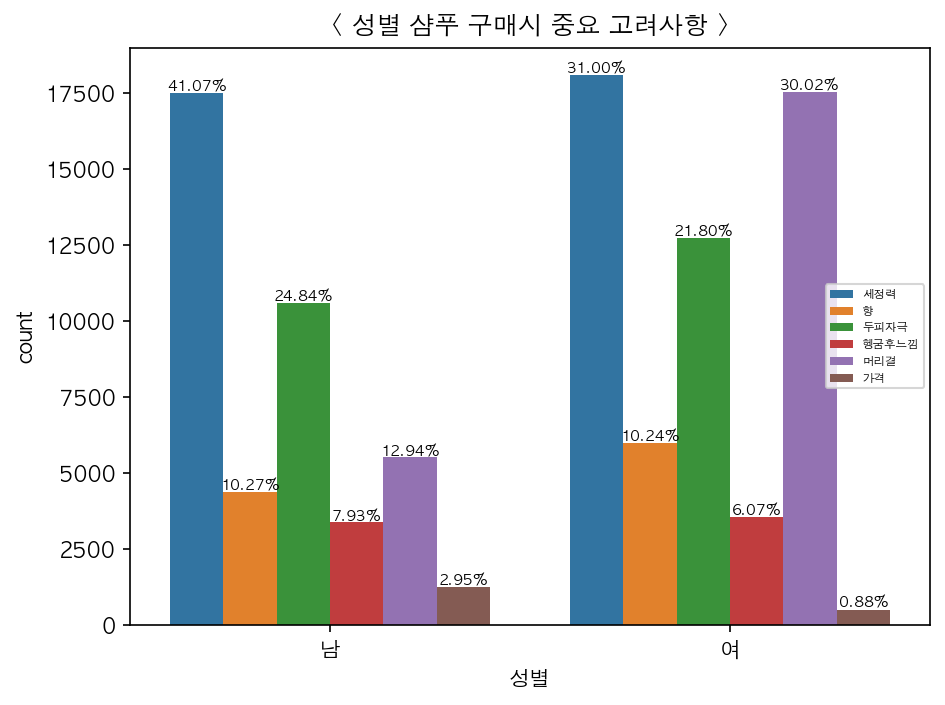

In [253]:
# countplot 생성
ax = sns.countplot(data=df, x="성별", hue="샴푸 구매시 중요 고려 사항")
plt.title("< 성별 샴푸 구매시 중요 고려사항 >")
plt.legend(fontsize=5.5)
plt.tight_layout()

# 비율 표시
for p in ax.patches:
    count = p.get_height()  # 각 바의 높이 (빈도수)
    # 성별에 따른 총합 계산
    gender = p.get_x() + p.get_width() / 2  # 성별 위치
    total = len(df[df["성별"] == ("남" if gender < 0.5 else "여")])
    
    if total > 0 and count > 0:  # 총합이 0보다 크고, count가 0이 아닌 경우만 표시
        percentage = count / total * 100  # 비율 계산
        if percentage > 0:  # 비율이 0%가 아닐 때만 표시
            ax.text(p.get_x() + p.get_width() / 2,  # x 좌표: 바의 중앙
                    count + 0.001 * total,  # y 좌표: 바의 높이보다 약간 위
                    f'{percentage:.2f}%', ha='center', fontsize=7)  # 텍스트 중앙 정렬

plt.tight_layout()

## 모발 상태별 샴푸 구매시 중요 고려 사항

In [6]:
color_df

,성별,연령대,사진 위치,샴푸 사용 빈도,펌 주기,염색 주기,현재 모발 상태,사용 중인 두피모발 제품,두피케어제품 사용 희망,샴푸 구매시 중요 고려 사항,...,염색 모발,가발 사용,모발 이식/시술,샴푸,린스,트리트먼트,헤어 에센스,두피 세럼,헤어 스타일링제,두피 스케일링제
3,여,60대,TH,1일 1회,1~3회/연,7회 이상/연,염색 모발,"샴푸,린스,헤어에센스,헤어 스타일링제",예,두피자극,...,1,0,0,1,1,0,1,0,1,0
4,여,40대,TH,1일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,린스",예,두피자극,...,1,0,0,1,1,0,1,0,0,0
5,여,10대,LH,2일 1회,1~3회/연,하지않음,염색 모발,"샴푸,린스",예,향,...,1,0,0,1,1,0,0,0,0,0
6,남,30대,LH,1일 2회,하지않음,4~6회/연,염색 모발,샴푸,아니오,세정력,...,1,0,0,1,0,0,0,0,0,0
7,여,40대,TH,2일 1회,하지않음,4~6회/연,염색 모발,"샴푸,트리트먼트,헤어에센스,두피 세럼",예,두피자극,...,1,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101017,여,60대,BH,1일 1회,1~3회/연,7회 이상/연,"염색 모발,기타","샴푸,트리트먼트,헤어에센스",예,머리결,...,1,0,0,1,0,1,1,0,0,0
101018,여,20대,TH,1일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,트리트먼트",예,세정력,...,1,0,0,1,0,1,1,0,0,0
101019,여,30대,LH,1일 1회,1~3회/연,4~6회/연,염색 모발,"샴푸,헤어에센스,트리트먼트,두피 스케일링제",예,두피자극,...,1,0,0,1,0,1,1,0,0,1
101021,여,40대,TH,1일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,트리트먼트,두피 스케일링제",예,세정력,...,1,0,0,1,0,1,0,0,0,1


In [5]:
importance_order = ['세정력', '향', '두피자극', '헹굼후느낌', '머리결', '가격']

/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_5504/1456760617.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(["염색 모발"])
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_5504/1456760617.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(["가발 사용자"])
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_5504/1456760617.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(["모발 이식 및 시술자"])
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_5504/1456760617.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(["기타

<Figure size 960x720 with 0 Axes>

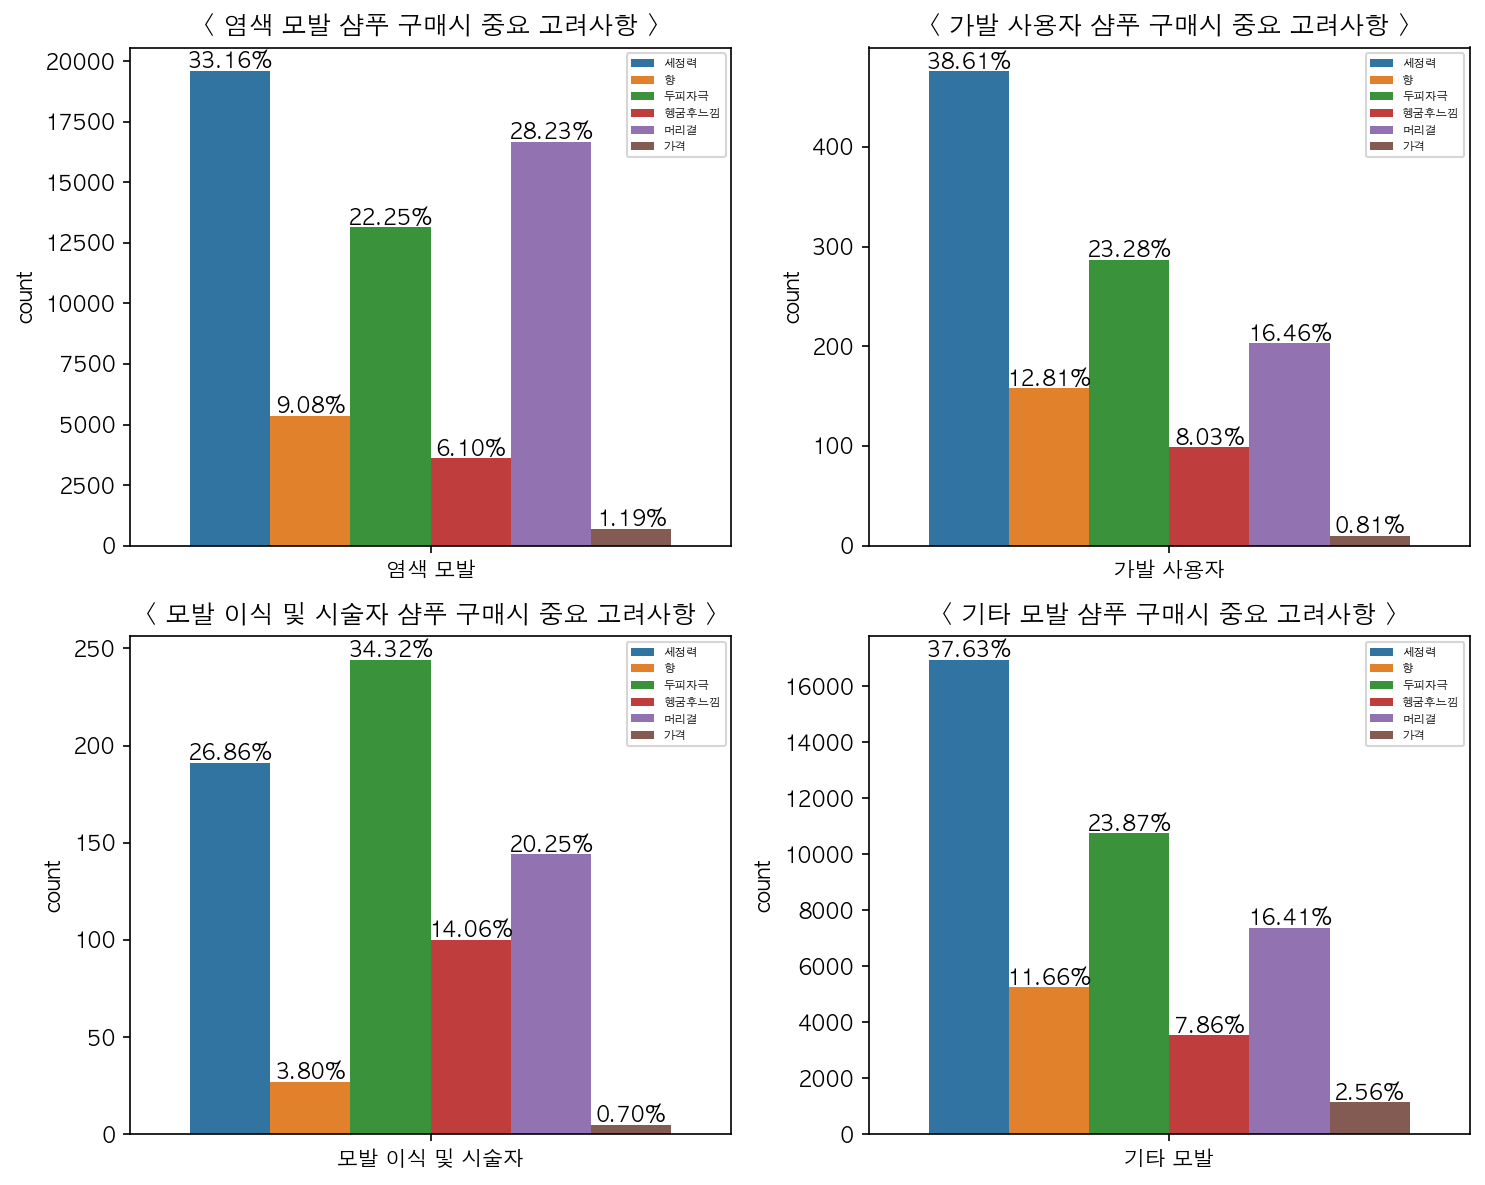

In [32]:
color_df = df[df["염색 모발"] == 1]
fake_df = df[df["가발 사용"] == 1]
surgery_df = df[df["모발 이식/시술"] == 1]
etc_df = df[df["기타"] == 1]

plt.figure(dpi = 150)
fig, axes = plt.subplots(2, 2, figsize = (10, 8))

sns.countplot(data = color_df, x = "염색 모발", hue = "샴푸 구매시 중요 고려 사항", ax = axes[0, 0], hue_order = importance_order)
axes[0, 0].legend(fontsize = 5.5)
axes[0, 0].set_title("< 염색 모발 샴푸 구매시 중요 고려사항 >")
axes[0, 0].set_xticklabels(["염색 모발"])
axes[0, 0].set_xlabel("")
total_count = len(color_df)
for p in axes[0, 0].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.002 * total_count
        axes[0, 0].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

sns.countplot(data = fake_df, x = "가발 사용", hue = "샴푸 구매시 중요 고려 사항", ax = axes[0, 1], hue_order = importance_order)
axes[0, 1].legend(fontsize = 5.5)
axes[0, 1].set_title("< 가발 사용자 샴푸 구매시 중요 고려사항 >")
axes[0, 1].set_xticklabels(["가발 사용자"])
axes[0, 1].set_xlabel("")
total_count = len(fake_df)
for p in axes[0, 1].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.002 * total_count
        axes[0, 1].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

sns.countplot(data = surgery_df, x = "모발 이식/시술", hue = "샴푸 구매시 중요 고려 사항", ax = axes[1, 0], hue_order = importance_order)
axes[1, 0].legend(fontsize = 5.5)
axes[1, 0].set_title("< 모발 이식 및 시술자 샴푸 구매시 중요 고려사항 >")
axes[1, 0].set_xticklabels(["모발 이식 및 시술자"])
axes[1, 0].set_xlabel("")
total_count = len(surgery_df)
for p in axes[1, 0].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.002 * total_count
        axes[1, 0].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

sns.countplot(data = etc_df, x = "기타", hue = "샴푸 구매시 중요 고려 사항", ax = axes[1, 1], hue_order = importance_order)
axes[1, 1].legend(fontsize = 5.5)
axes[1, 1].set_title("< 기타 모발 샴푸 구매시 중요 고려사항 >")
axes[1, 1].set_xticklabels(["기타 모발"])
axes[1, 1].set_xlabel("")
total_count = len(etc_df)
for p in axes[1, 1].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.002 * total_count
        axes[1, 1].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

plt.tight_layout()

## 추가 분석

In [204]:
df

,성별,연령대,사진 위치,샴푸 사용 빈도,펌 주기,염색 주기,현재 모발 상태,사용 중인 두피모발 제품,두피케어제품 사용 희망,샴푸 구매시 중요 고려 사항,기타,염색 모발,가발 사용,모발 이식/시술
0,남,20대,TH,1일 2회,4~6회/연,하지않음,기타,"샴푸,헤어에센스",예,세정력,1,0,0,0
1,남,60대,RH,1일 1회,하지않음,1~3회/연,기타,샴푸,예,세정력,1,0,0,0
2,남,30대,RH,1일 2회,4~6회/연,하지않음,기타,샴푸,예,향,1,0,0,0
3,여,60대,TH,1일 1회,1~3회/연,7회 이상/연,염색 모발,"샴푸,린스,헤어에센스,헤어 스타일링제",예,두피자극,0,1,0,0
4,여,40대,TH,1일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,린스",예,두피자극,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101022,여,40대,TH,1일 1회,하지않음,하지않음,기타,샴푸,예,두피자극,1,0,0,0
101023,남,20대,TH,1일 1회,1~3회/연,4~6회/연,염색 모발,"샴푸,헤어에센스,린스",예,머리결,0,1,0,0
101024,남,30대,RH,1일 2회,4~6회/연,하지않음,기타,"샴푸,린스,헤어에센스",예,향,1,0,0,0
101025,남,20대,RH,1일 2회,하지않음,하지않음,기타,샴푸,예,세정력,1,0,0,0


In [219]:
df.loc[(df["두피케어제품 사용 희망"] != "예") & (df["두피케어제품 사용 희망"] != "아니오"), "두피케어제품 사용 희망"] = "아니오"

## 두피케어제품 사용 희망자

In [98]:
hope_count = df["두피케어제품 사용 희망"].value_counts()

Text(0.5, 1.0, '< 두피케어제품 사용 희망 >')

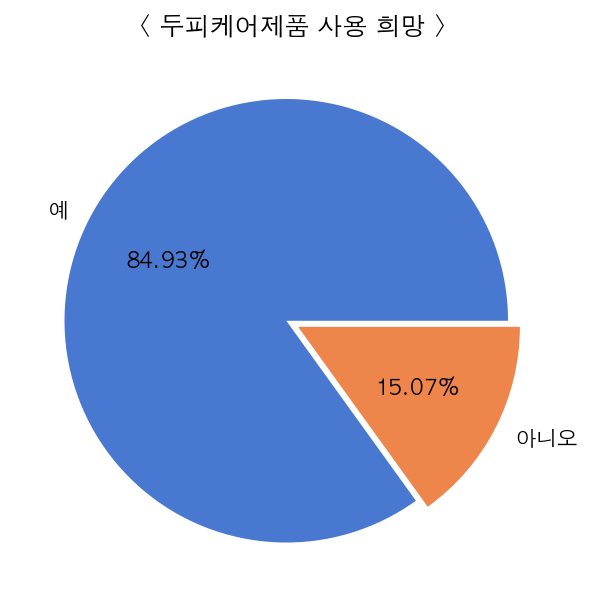

In [280]:
plt.pie(hope_count, labels = hope_count.index, autopct='%1.2f%%',
        colors=sns.color_palette("muted"), explode = [0.03] * len(hope_count))
plt.title("< 두피케어제품 사용 희망 >")

## 두피케어제품 사용 비희망자

## 사용중인 헤어 제품 라벨 인코딩

In [285]:
tmp = df["사용 중인 두피모발 제품"].to_list()

hair = {
    "샴푸" : "샴푸",
    "린스" : "린스",
    "트리트먼트" : "트리트먼트",
    "헤어에센스" : "헤어 에센스",
    "두피 세럼" : "두피 세럼",
    "헤어 스타일링제" : "헤어 스타일링제",
    "두피 스케일링제" : "두피 스케일링제"
}

In [286]:
tmp_df = pd.DataFrame(tmp, columns = ["사용중인 제품"])

In [287]:
tmp_df

,사용중인 제품
0,"샴푸,헤어에센스"
1,샴푸
2,샴푸
3,"샴푸,린스,헤어에센스,헤어 스타일링제"
4,"샴푸,헤어에센스,린스"
...,...
101022,샴푸
101023,"샴푸,헤어에센스,린스"
101024,"샴푸,린스,헤어에센스"
101025,샴푸


In [288]:
for key, label in hair.items():
    tmp_df[label] = tmp_df['사용중인 제품'].apply(lambda x: 1 if key in x else 0)

In [290]:
tmp_df.drop("사용중인 제품", axis = 1, inplace = True)

In [291]:
df = pd.concat([df, tmp_df], axis = 1)

In [293]:
df.to_csv("./meta_data_final.csv", index = False)

## 사용중인 제품 분류

In [69]:
linse_df = n_df.loc[n_df["린스"] == 1]
treat_df = n_df.loc[n_df["트리트먼트"] == 1]
essence_df = n_df.loc[n_df["헤어 에센스"] == 1]
serum_df = n_df.loc[n_df["두피 세럼"] == 1]
style_df = n_df.loc[n_df["헤어 스타일링제"] == 1]
scale_df = n_df.loc[n_df["두피 스케일링제"] == 1]

In [37]:
n_df = df[df["두피케어제품 사용 희망"] == "아니오"]

In [38]:
n_df

,성별,연령대,사진 위치,샴푸 사용 빈도,펌 주기,염색 주기,현재 모발 상태,사용 중인 두피모발 제품,두피케어제품 사용 희망,샴푸 구매시 중요 고려 사항,...,염색 모발,가발 사용,모발 이식/시술,샴푸,린스,트리트먼트,헤어 에센스,두피 세럼,헤어 스타일링제,두피 스케일링제
6,남,30대,LH,1일 2회,하지않음,4~6회/연,염색 모발,샴푸,아니오,세정력,...,1,0,0,1,0,0,0,0,0,0
8,남,20대,TH,1일 1회,1~3회/연,하지않음,기타,"샴푸,트리트먼트",아니오,세정력,...,0,0,0,1,0,1,0,0,0,0
9,남,20대,TH,1일 1회,하지않음,1~3회/연,기타,샴푸,아니오,세정력,...,0,0,0,1,0,0,0,0,0,0
11,남,30대,TH,1일 2회,하지않음,하지않음,기타,샴푸,아니오,세정력,...,0,0,0,1,0,0,0,0,0,0
20,남,50대,TH,1일 1회,하지않음,4~6회/연,염색 모발,샴푸,아니오,두피자극,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100978,남,20대,BH,1일 1회,1~3회/연,하지않음,기타,"샴푸,린스,트리트먼트",아니오,향,...,0,0,0,1,1,1,0,0,0,0
100985,여,10대,RH,1일 1회,1~3회/연,1~3회/연,염색 모발,"샴푸,린스",아니오,머리결,...,1,0,0,1,1,0,0,0,0,0
100997,남,30대,TH,2일 1회,1~3회/연,하지않음,기타,샴푸,아니오,헹굼후느낌,...,0,0,0,1,0,0,0,0,0,0
100999,여,40대,TH,1일 1회,1~3회/연,4~6회/연,염색 모발,"샴푸,헤어에센스,두피 세럼,트리트먼트,린스",아니오,머리결,...,1,0,0,1,1,1,1,1,0,0


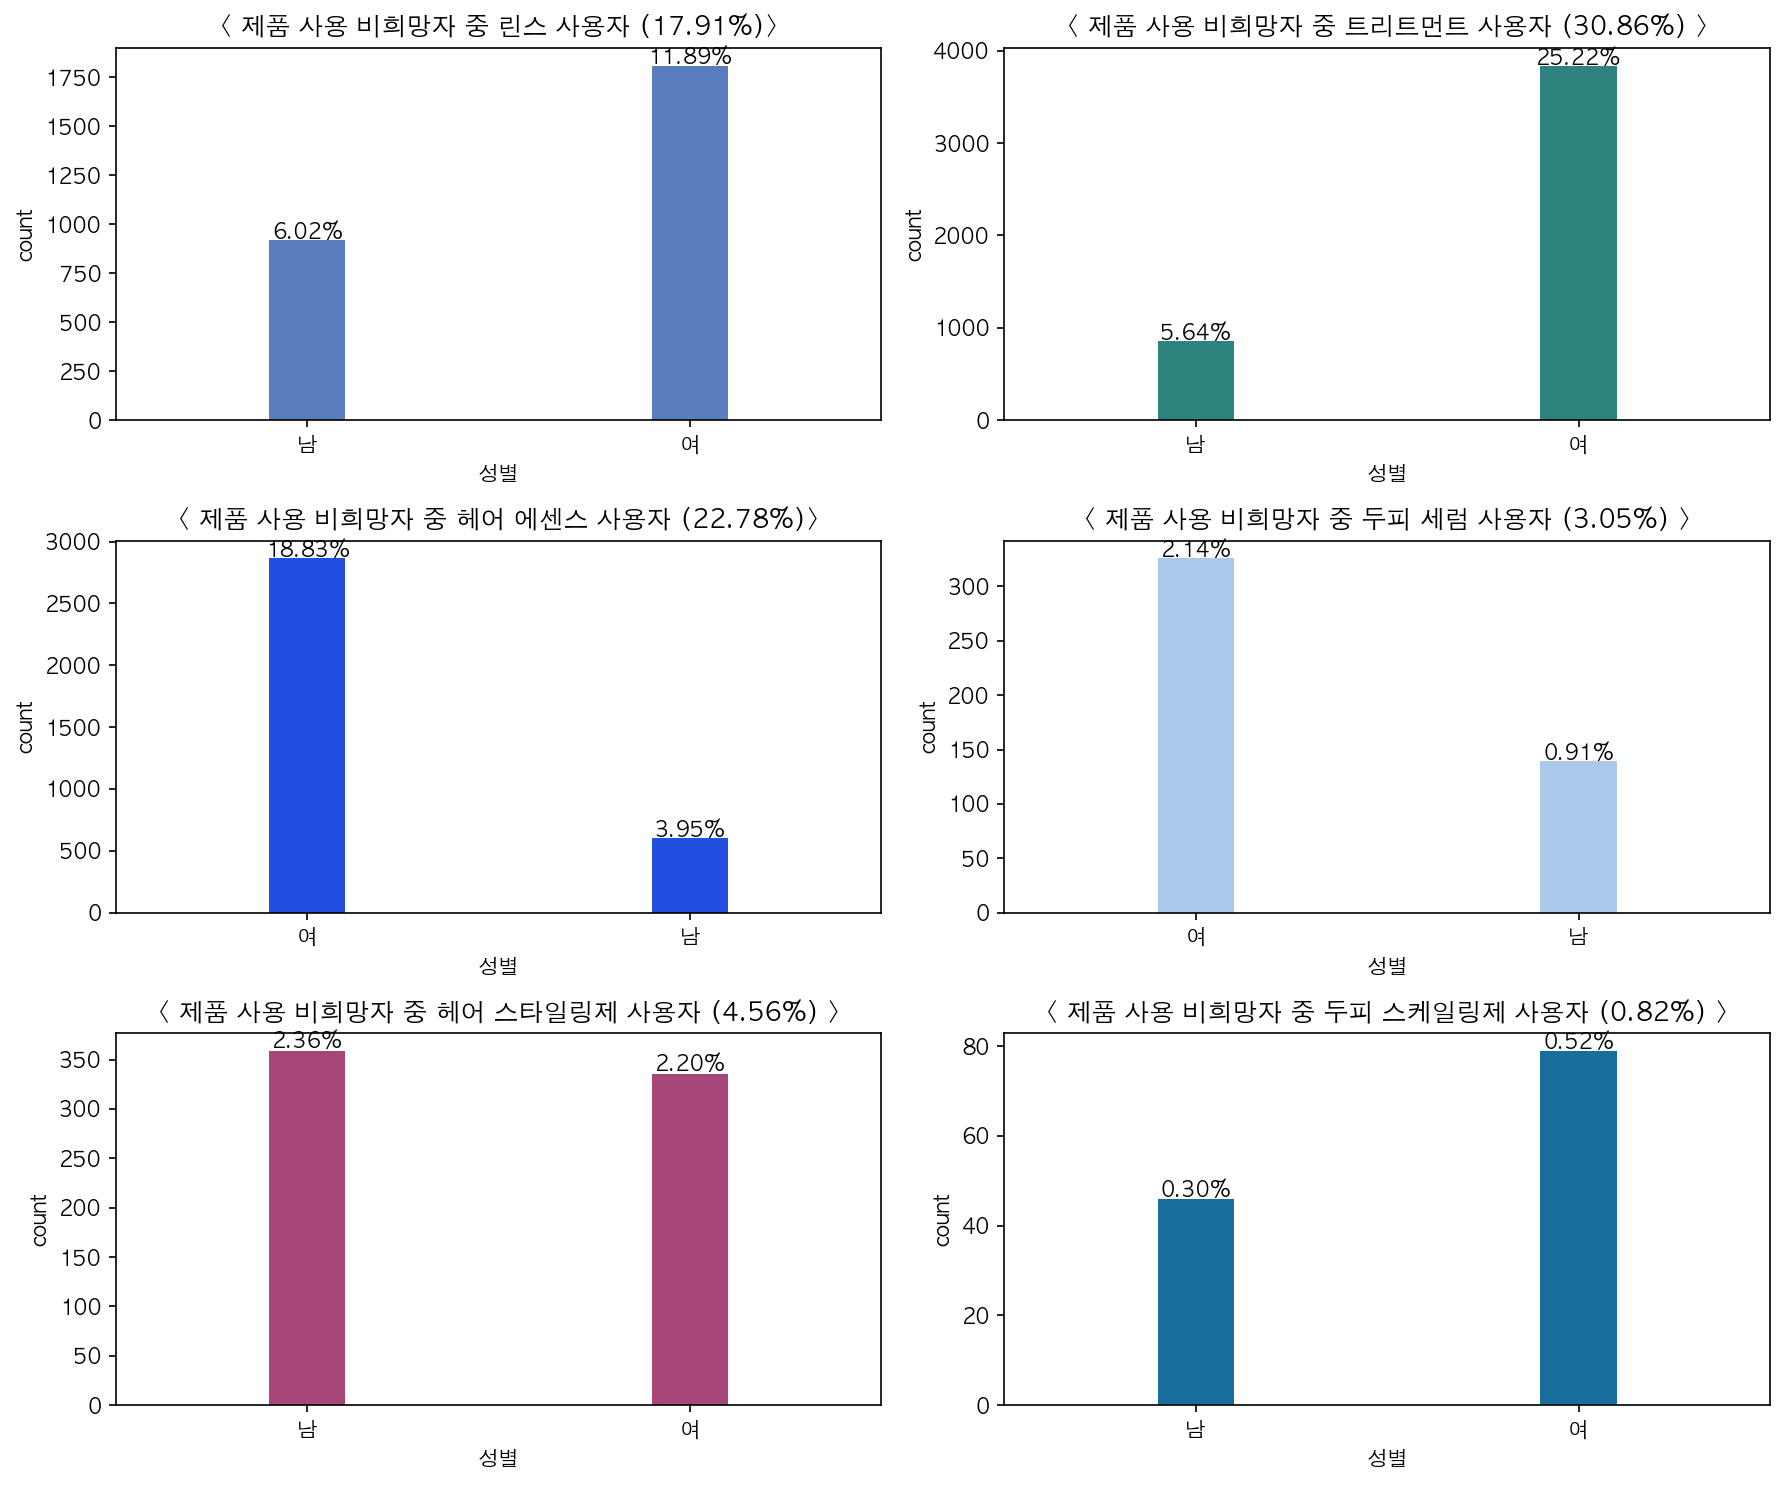

In [88]:
fig, axes = plt.subplots(3, 2, figsize = (12,10))

sns.countplot(data = linse_df, x = "성별", hue = "린스", ax = axes[0, 0], palette = 'muted', width = 0.2).get_legend().remove()
axes[0, 0].set_title("< 제품 사용 비희망자 중 린스 사용자 (17.91%)>")
total_count = len(n_df)
for p in axes[0, 0].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.0005 * total_count
        axes[0, 0].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

sns.countplot(data = treat_df, x = "성별", hue = "트리트먼트", ax = axes[0, 1], palette = 'viridis', width = 0.2).get_legend().remove()
axes[0, 1].set_title("< 제품 사용 비희망자 중 트리트먼트 사용자 (30.86%) >")
total_count = len(n_df)
for p in axes[0, 1].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.0005 * total_count
        axes[0, 1].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

sns.countplot(data = essence_df, x = "성별", hue = "헤어 에센스", ax = axes[1, 0], palette = 'bright', width = 0.2).get_legend().remove()
axes[1, 0].set_title("< 제품 사용 비희망자 중 헤어 에센스 사용자 (22.78%)>")
total_count = len(n_df)
for p in axes[1, 0].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.0005 * total_count
        axes[1, 0].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

sns.countplot(data = serum_df, x = "성별", hue = "두피 세럼", ax = axes[1, 1], palette = 'pastel', width = 0.2).get_legend().remove()
axes[1, 1].set_title("< 제품 사용 비희망자 중 두피 세럼 사용자 (3.05%) >")
total_count = len(n_df)
for p in axes[1, 1].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.0001 * total_count
        axes[1, 1].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

sns.countplot(data = style_df, x = "성별", hue = "헤어 스타일링제", ax = axes[2, 0], palette = 'magma', width = 0.2).get_legend().remove()
axes[2, 0].set_title("< 제품 사용 비희망자 중 헤어 스타일링제 사용자 (4.56%) >")
total_count = len(n_df)
for p in axes[2, 0].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.0002 * total_count
        axes[2, 0].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

sns.countplot(data = scale_df, x = "성별", hue = "두피 스케일링제", ax = axes[2, 1], palette = 'colorblind', width = 0.2).get_legend().remove()
axes[2, 1].set_title("< 제품 사용 비희망자 중 두피 스케일링제 사용자 (0.82%) >")
total_count = len(n_df)
for p in axes[2, 1].patches:
    count = p.get_height()
    if count > 0:  # 높이가 0보다 큰 경우만 표시
        percentage = f'{count / total_count * 100:.2f}%'
        offset = 0.00003 * total_count
        axes[2, 1].text(p.get_x() + p.get_width() / 2, p.get_height() + offset, percentage, ha='center')

plt.tight_layout()

In [147]:
only_shampoo = n_df[n_df["사용 중인 두피모발 제품"] == "샴푸"]
not_only_shampoo = n_df[n_df["사용 중인 두피모발 제품"] != "샴푸"]

In [148]:
len(only_shampoo), len(not_only_shampoo)

(7283, 7937)

In [167]:
sh = [len(only_shampoo), len(not_only_shampoo)]

Text(0.5, 1.0, '< 두피 케어 제품 비희망자 중 케어제품 사용 비율 >')

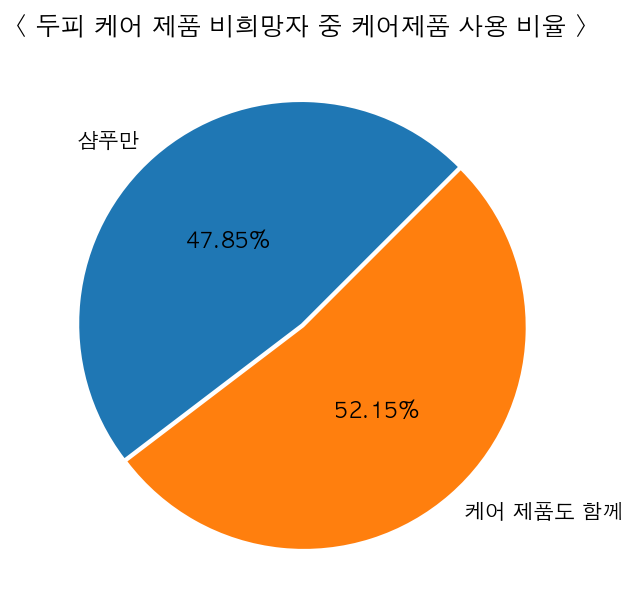

In [168]:
plt.pie(sh, labels = ["샴푸만", "케어 제품도 함께"], autopct = '%1.2f%%',
        explode = [0, 0.02], startangle= 45, textprops= {'fontsize': 10}, pctdistance = 0.5)
plt.title("< 두피 케어 제품 비희망자 중 케어제품 사용 비율 >")

In [169]:
y_df = df[df["두피케어제품 사용 희망"] == "예"]

In [170]:
y_only_shampoo = y_df[y_df["사용 중인 두피모발 제품"] == "샴푸"]
y_not_only_shampoo = y_df[y_df["사용 중인 두피모발 제품"] != "샴푸"]
y_sh = [len(y_only_shampoo), len(y_not_only_shampoo)]

Text(0.5, 1.0, '< 두피 케어 제품 희망자 중 케어제품 사용 비율 >')

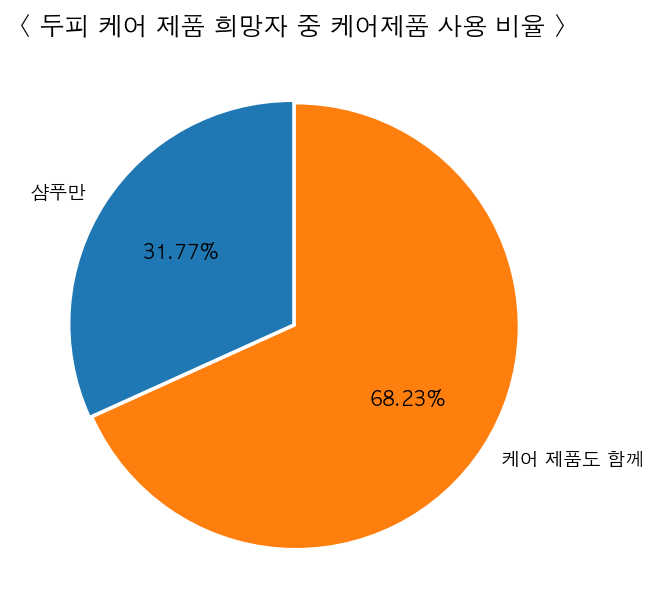

In [171]:
plt.pie(y_sh, labels = ["샴푸만", "케어 제품도 함께"], autopct = '%1.2f%%',
        explode = [0, 0.02], startangle= 90, textprops= {'fontsize': 9}, pctdistance = 0.6)
plt.title("< 두피 케어 제품 희망자 중 케어제품 사용 비율 >")

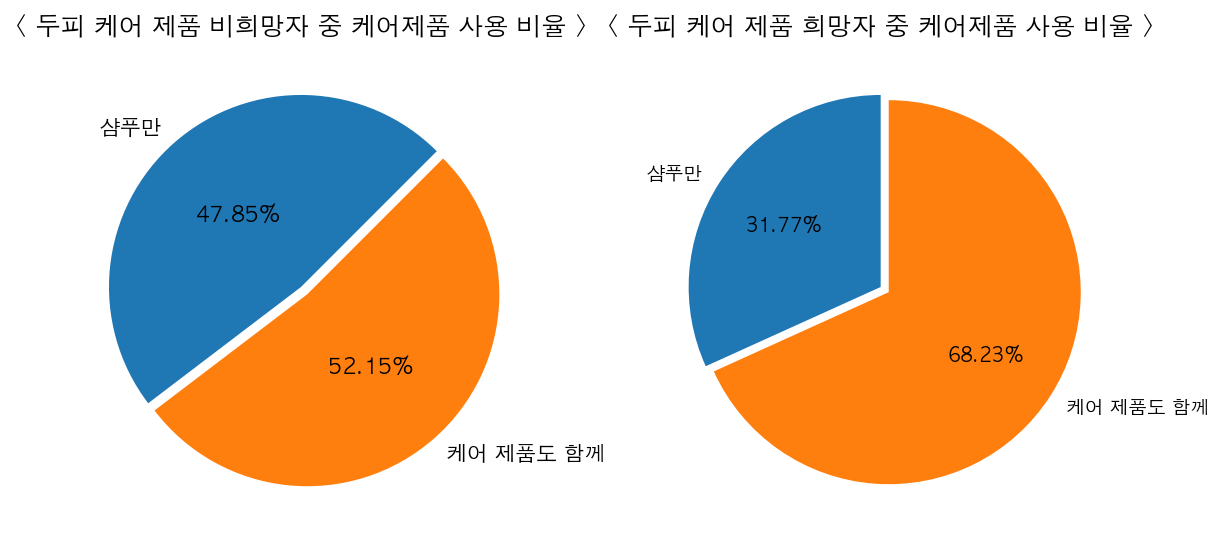

In [172]:
fig, axes = plt.subplots(1, 2, figsize = (8, 6))

axes[0].pie(sh, labels = ["샴푸만", "케어 제품도 함께"], autopct = '%1.2f%%',
        explode = [0, 0.05], startangle= 45, textprops= {'fontsize': 10}, pctdistance = 0.5)
axes[0].set_title("< 두피 케어 제품 비희망자 중 케어제품 사용 비율 >")

axes[1].pie(y_sh, labels = ["샴푸만", "케어 제품도 함께"], autopct = '%1.2f%%',
        explode = [0, 0.05], startangle= 90, textprops= {'fontsize': 9}, pctdistance = 0.6)
axes[1].set_title("< 두피 케어 제품 희망자 중 케어제품 사용 비율 >")

plt.tight_layout()